In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import  linregress
l = 19.009

   st[g/ml]   pom1   pom2   pom3  pom4   pom5   pom6   pom7    srednia  \
0   0.00000   0.55   0.70   0.65   0.6   0.70   0.65   0.75   0.657143   
1   0.10088  12.55  12.80  13.00  13.0  12.90  12.90  12.90  12.864286   
2   0.05044   4.10   4.00   4.15   4.3   4.45   4.60   4.55   4.307143   
3   0.09030  12.00  12.00  12.00  12.0  12.00  12.05  12.00  12.007143   
4   0.07998  10.75  10.90  10.80  10.7  10.90  10.70  10.70  10.778571   
5   0.07022   9.50   9.80   9.75  10.0   9.90   9.80   9.90   9.807143   
6   0.04030   5.80   5.85   5.95   6.0   6.00   5.85   5.90   5.907143   

   blsredniej  0 przesunięte o + 0.1  
0    0.062270                    NaN  
1    0.143214                    NaN  
2    0.216182                    NaN  
3    0.017496                    NaN  
4    0.083910                    NaN  
5    0.147427                    NaN  
6    0.072843                    NaN  


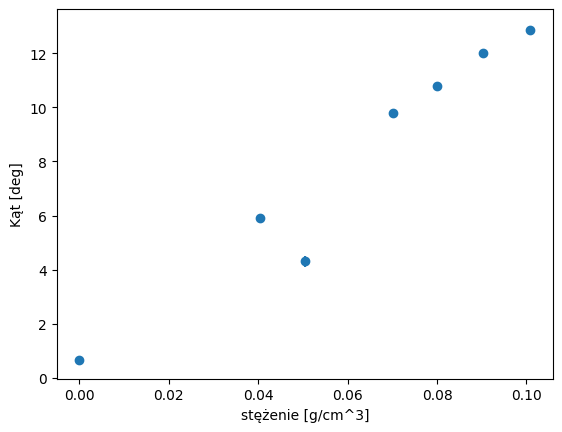

In [11]:
raw_data = pd.read_excel('Lab74.xlsx')
print(raw_data)
plt.xlabel('stężenie [g/cm^3]')
plt.ylabel('Kąt [deg]')
plt.scatter(raw_data.loc[:,'st[g/ml]'],raw_data.loc[:,'srednia'])
plt.errorbar(raw_data.loc[:,'st[g/ml]'],raw_data.loc[:,'srednia'],yerr=raw_data.loc[:,'blsredniej'],ls = 'none')
plt.show()

                            WLS Regression Results                            
Dep. Variable:                srednia   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2997.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           6.66e-07
Time:                        14:18:35   Log-Likelihood:                 1.9773
No. Observations:                   6   AIC:                           0.04530
Df Residuals:                       4   BIC:                           -0.3712
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6728      0.175      3.844      0.0

c:\Users\karol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\karol\AppData\Local\Temp\ipykernel_10764\2091818633.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(raw_data.loc[:,'st[g/ml]'],results.params[1]*raw_data.loc[:,'st[g/ml]'] + results.params[0])


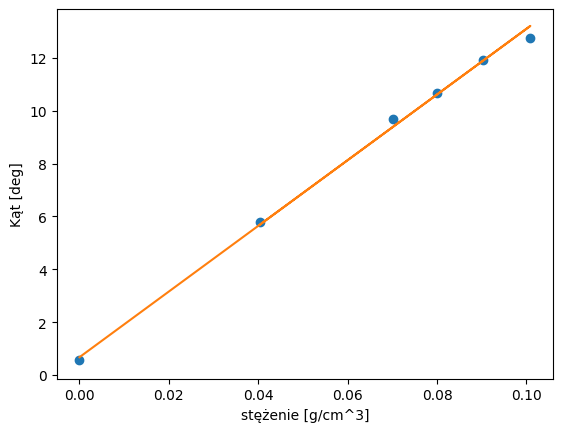

a = 6.5399810364157505 +/- 0.11945750815669516


C:\Users\karol\AppData\Local\Temp\ipykernel_10764\2091818633.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'a = {results.params[1]/l} +/- {results.bse[1]/l}')


In [12]:
try:
    raw_data = raw_data.drop(2)
    raw_data['srednia'] = raw_data['srednia'] - 0.1
except:
    pass
finally:
    #print(raw_data)
    plt.scatter(raw_data.loc[:,'st[g/ml]'],raw_data.loc[:,'srednia'])
    plt.errorbar(raw_data.loc[:,'st[g/ml]'],raw_data.loc[:,'srednia'],yerr=raw_data.loc[:,'blsredniej'],ls = 'none')
    from statsmodels.api import WLS,add_constant
    x = add_constant(list(raw_data.loc[:,'st[g/ml]']))
    model = WLS(raw_data.loc[:,'srednia'],x, weights=1/raw_data.loc[:,'blsredniej'],hasconst=True)
    results = model.fit()
    print(results.summary())
    plt.plot(raw_data.loc[:,'st[g/ml]'],results.params[1]*raw_data.loc[:,'st[g/ml]'] + results.params[0])
    plt.xlabel('stężenie [g/cm^3]')
    plt.ylabel('Kąt [deg]')
    plt.show()
    print(f'a = {results.params[1]/l} +/- {results.bse[1]/l}')